     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

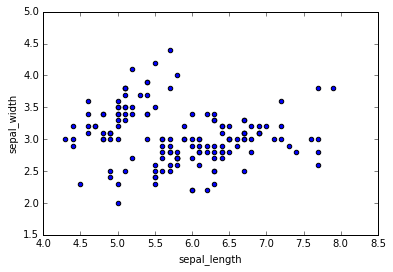

In [1]:
import traceback,logging,os,signal,time,gzip,StringIO,logging.handlers,re,sys,requests, random, math
import numpy as np
import pandas as pd
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import matplotlib.pyplot as plt

%matplotlib inline

config = dict()
config['resource_dir'] = "../resources/"
config['raw_file'] = config['resource_dir'] + "iris.data.csv"

iris_df = pd.read_csv(config['raw_file'],header=None)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
print iris_df
iris_df.plot.scatter(x='sepal_length',y='sepal_width')

Iris-setosa
Iris-versicolor
Iris-virginica


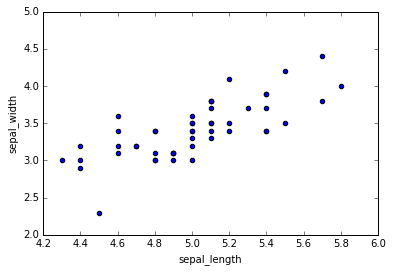

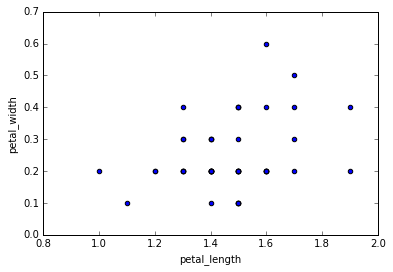

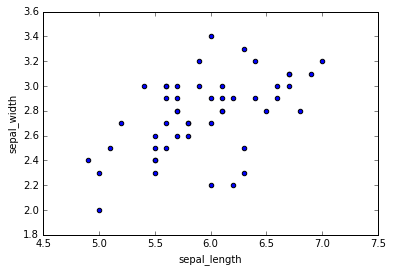

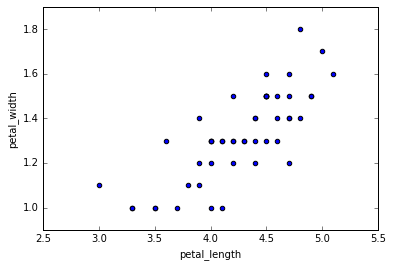

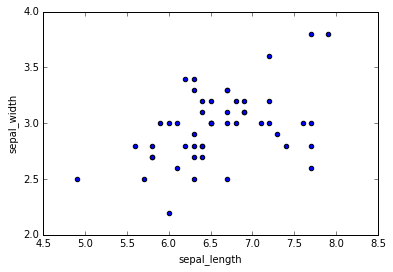

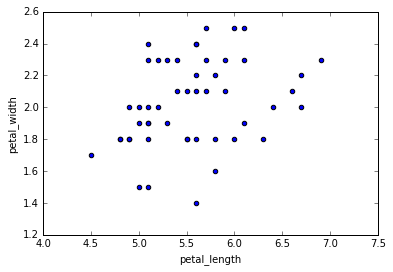

In [2]:
class_list = iris_df['class'].drop_duplicates().values.tolist()
species_dict = dict()

for i in class_list:
    species_dict[i] = iris_df[iris_df['class'] == i]
    print i
    iris_df[iris_df['class'] == i].plot.scatter(x='sepal_length',y='sepal_width')
    iris_df[iris_df['class'] == i].plot.scatter(x='petal_length',y='petal_width')
    

In [3]:
config = dict()
config['resource_dir'] = "../resources/"
config['raw_file'] = config['resource_dir'] + "un.csv"

un_df = pd.read_csv(config['raw_file'])
un_df

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.000
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.360
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,Africa,6.69,NaN,NaN,NaN,44.9,48.1,124.0,355.0,NaN,NaN,NaN,NaN
6,Antigua,America,NaN,53.0,NaN,NaN,NaN,NaN,24.0,6966.0,74.4,56.2,NaN,NaN
7,Argentina,America,2.62,NaN,NaN,NaN,69.6,76.8,22.0,8055.0,76.2,41.3,3.800,3.800
8,Armenia,Europe,1.70,22.0,NaN,NaN,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500
9,Australia,Oceania,1.89,76.0,16.3,16.1,75.4,81.2,6.0,20046.0,74.0,53.8,NaN,NaN


In [4]:
# 206 rows in the dataset, not including header
# number of non-null values are shown
print un_df.count()
# region will be the base to try cluster on
print un_df.dtypes
#what is the cluster centroid

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64
country                    object
region                     object
tfr                       float64
contraception             float64
educationMale             float64
educationFemale           float64
lifeMale                  float64
lifeFemale                float64
infantMortality           float64
GDPperCapita              float64
economicActivityMale      float64
economicActivityFemale    float64
illiteracyMale            float64
illiteracyFemale          float64
dtype: object
